In [10]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.datasets import load_iris
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn import datasets

In [2]:
x,y_true=make_blobs(n_samples=300,centers=4,cluster_std=0.5,random_state=0)


In [3]:
db=DBSCAN(eps=0.3,min_samples=10).fit(x)
core_samples_mask=np.zeros_like(db.labels_,dtype=bool)
core_samples_mask[db.core_sample_indices_]=True
labels=db.labels_

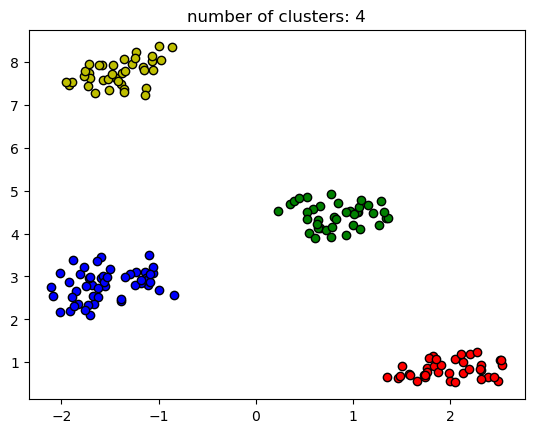

In [8]:
n_clusters_=len(set(labels))-(1 if -1 in labels else 0)
unique_labels=set(labels)
colors=['y','b','g','r']

for k,col in zip(unique_labels,colors):
    if k==-1:
        col='k'

    class_member_mask=(labels==k)
    xy=x[class_member_mask & core_samples_mask]
    plt.plot(xy[:,0],xy[:,1],'o',markerfacecolor=col,markeredgecolor='k',markersize=6)

    xy=x[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:,0],xy[:,1],'o',markerfacecolor=col,markeredgecolor='k',markersize=6)

plt.title('number of clusters: %d' % n_clusters_)
plt.show()

In [40]:
iris=load_iris()
x=iris.data

In [41]:
dbscan=DBSCAN(eps=0.5,min_samples=4)
dbscan.fit(x)
labels=dbscan.labels_

In [42]:
n_clusters=len(set(labels))-(1 if -1 in labels else 0)
n_clusters

3

In [43]:
unique_labels=set(labels)
unique_labels

{-1, 0, 1, 2}

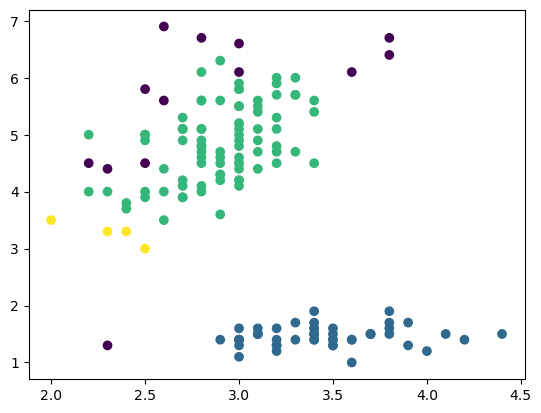

In [44]:
plt.scatter(x[:,1],x[:,2],c=labels)
plt.show()

In [45]:
iris=load_iris()
x=iris.data

In [61]:
dbscan=DBSCAN(eps=0.5,min_samples=5)
dbscan.fit(x)
labels=dbscan.labels_
cl=dbscan.fit_predict(x)

In [62]:
labels

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,
        1,  1,  1,  1,  1, -1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1], dtype=int64)

In [63]:
len(x)

137

In [64]:
unique_labels=set(labels)
unique_labels

{-1, 0, 1}

In [65]:
import pandas as pd 
x=pd.DataFrame(x)
x
x['m']=list(dbscan.labels_)
x

,0,1,2,3,4,m
0,5.1,3.5,1.4,0.2,0.0,0
1,4.9,3.0,1.4,0.2,0.0,0
2,4.7,3.2,1.3,0.2,0.0,0
3,4.6,3.1,1.5,0.2,0.0,0
4,5.0,3.6,1.4,0.2,0.0,0
...,...,...,...,...,...,...
132,6.7,3.0,5.2,2.3,1.0,1
133,6.3,2.5,5.0,1.9,1.0,1
134,6.5,3.0,5.2,2.0,1.0,1
135,6.2,3.4,5.4,2.3,1.0,1


In [66]:
x=x[x['m']!=-1]
x.shape

(133, 6)

In [67]:
y=x['m']
y

0      0
1      0
2      0
3      0
4      0
      ..
132    1
133    1
134    1
135    1
136    1
Name: m, Length: 133, dtype: int64

In [68]:
x=x.values
y=y.values

In [69]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1], dtype=int64)

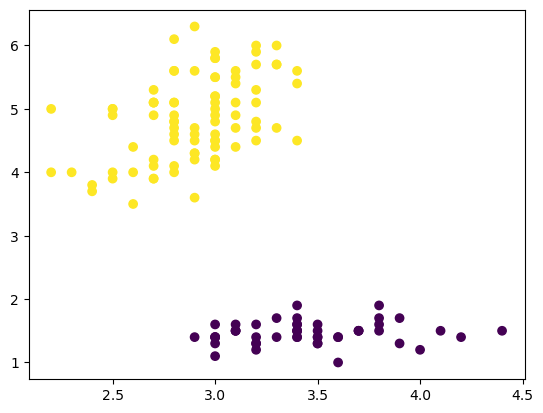

In [70]:
plt.scatter(x[:,1],x[:,2],c=y)
plt.show()

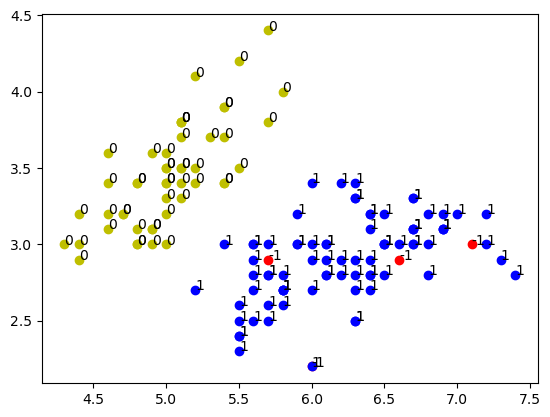

In [72]:
colors=['y','b','r']
for i in range(len(x)):
    plt.scatter(x[i,0],x[i,1], c=colors[labels[i]])
    plt.annotate(str(labels[i]),(x[i,0],x[i,1]))

plt.show()

In [73]:
from scipy.cluster.hierarchy import dendrogram,linkage

In [74]:
x=[4,5,11,4,3,11,5,6,11,12]
y=[21,19,24,18,16,25,23,22,21,21]

In [75]:
zip(x,y)

In [76]:
data=list(zip(x,y))
print(data)

[(4, 21), (5, 19), (11, 24), (4, 18), (3, 16), (11, 25), (5, 23), (6, 22), (11, 21), (12, 21)]


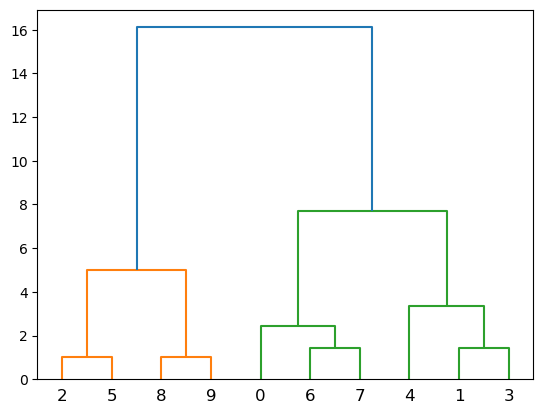

In [77]:
linkage_data=linkage(data,method='ward',metric='euclidean')
dendrogram(linkage_data)
plt.show()

In [95]:
iris=load_iris()
x=iris.data

In [96]:
from scipy.cluster.hierarchy import linkage,dendrogram,fcluster

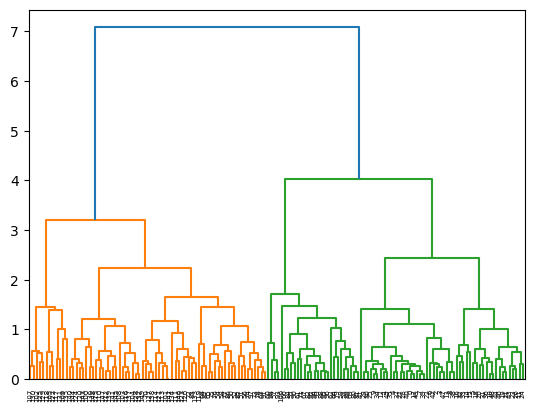

In [97]:
hirarachical=linkage(x,method='complete')
dendrogram(hirarachical)
plt.show()

سینگل فاصله ی نزدیک ترین فاصله بیت دو خووشه را بررسی می کنم ی تونه خوشه های کروی و غیر کشیده را شناسایی کند - مشکل : ممکنه خوشه هارو به صورت زنیچیره ای بهم بچسبونه-
 می تونه خوشه های متراگم کم تر تخت تاصیر اوت لیر هست و خوشه های موازن تری رو فراهم می کند وخوشه های غیر کروی رو نمی تونه شناسایی کنه  کامپلیت فاصله ی دور ترین تقاط را بررسی مس کند 
 خوشه های متنوع تری ایحاد می کند اورنچ فاصله میانگین دو خوشه را بررسی میکن ترکیبی از ویژگی های کامپلیت و معمولا نتایجش بهتر از سینگل و کامپلیت 

In [98]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import make_blobs
from sklearn import manifold,datasets

In [99]:
x1,y1=make_blobs(n_samples=50,centers=[[4,4],[-2,-1],[1,1],[10,4]],cluster_std=0.9)

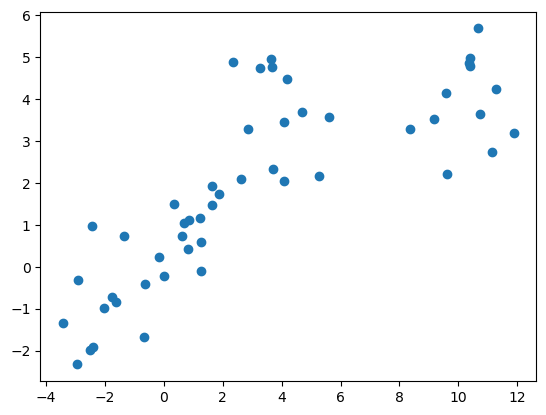

In [100]:
plt.scatter(x1[:,0],x1[:,1],marker='o')

In [101]:
agglom=AgglomerativeClustering(n_clusters=4,linkage='average')

In [102]:
agglom.fit(x1,y1)

AgglomerativeClustering(linkage='average', n_clusters=4)

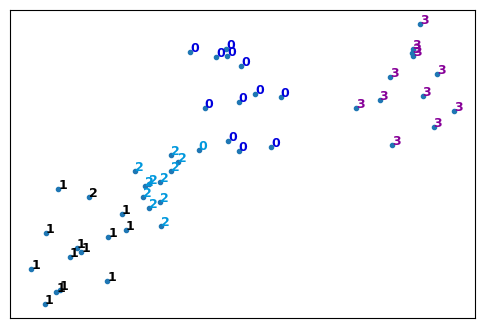

In [103]:
plt.figure(figsize=(6,4))
x_min,x_max=np.min(x1,axis=0),np.max(x1,axis=0)
x1=(x1-x_min)/(x_max-x_min)
for i in range(x1.shape[0]):
    plt.text(x1[i,0],x1[i,1],str(y1[i]),color=plt.cm.nipy_spectral(agglom.labels_[i]/10.),fontdict={'weight':'bold','size':9})

plt.xticks([])
plt.yticks([])
plt.scatter(x1[:,0],x1[:,1],marker='.')
plt.show()


In [105]:
from scipy.spatial import distance_matrix
dist_matrix=distance_matrix(x1,x1)
print(dist_matrix)

[[0.         1.00576513 1.24302548 ... 1.16317452 0.97151865 0.59607254]
 [1.00576513 0.         0.44176308 ... 0.49312522 0.03567748 0.41908062]
 [1.24302548 0.44176308 0.         ... 0.14496353 0.46475612 0.67419699]
 ...
 [1.16317452 0.49312522 0.14496353 ... 0.         0.50738901 0.62662694]
 [0.97151865 0.03567748 0.46475612 ... 0.50738901 0.         0.38712704]
 [0.59607254 0.41908062 0.67419699 ... 0.62662694 0.38712704 0.        ]]


In [107]:
from scipy.cluster import hierarchy
z=hierarchy.linkage(dist_matrix,'complete')

C:\Users\nahal\AppData\Local\Temp\ipykernel_80740\414732663.py:2: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  z=hierarchy.linkage(dist_matrix,'complete')


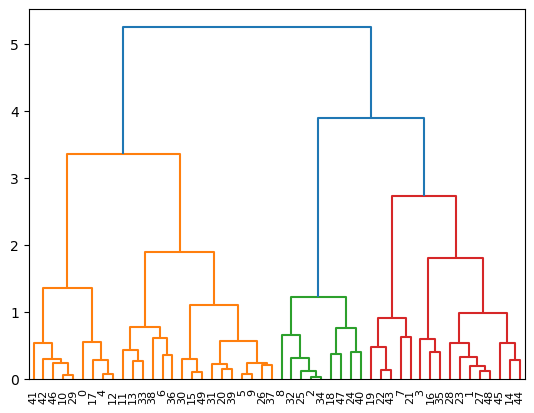

In [109]:
dendro=hierarchy.dendrogram(z)

In [110]:
x= pd.read_csv(r'C:\Users\nahal\Desktop\ML\car2.csv')
print('shape of dataset:',x.shape)
x.head()

shape of dataset: (159, 16)


,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition
0,Acura,Integra,16.919,16.360,0.000,21.500,1.800,140.000,101.200,67.300,172.400,2.639,13.200,28.000,2.828,0.0
1,Acura,TL,39.384,19.875,0.000,28.400,3.200,225.000,108.100,70.300,192.900,3.517,17.200,25.000,3.673,0.0
2,Acura,CL,14.114,18.225,0.000,$null$,3.200,225.000,106.900,70.600,192.000,3.470,17.200,26.000,2.647,0.0
3,Acura,RL,8.588,29.725,0.000,42.000,3.500,210.000,114.600,71.400,196.600,3.850,18.000,22.000,2.150,0.0
4,Audi,A4,20.397,22.255,0.000,23.990,1.800,150.000,102.600,68.200,178.000,2.998,16.400,27.000,3.015,0.0


In [111]:
x.dtypes

manufact      object
model         object
sales         object
resale        object
type          object
price         object
engine_s      object
horsepow      object
wheelbas      object
width         object
length        object
curb_wgt      object
fuel_cap      object
mpg           object
lnsales       object
partition    float64
dtype: object

In [112]:
print('shape of dataset before cleaning:',x.size)
x[['sales','resale','type','price','engine_s','horsepow','wheelbas','width','length','curb_wgt','fuel_cap','mpg','lnsales']]=x[['sales','resale','type','price','engine_s','horsepow','wheelbas','width','length','curb_wgt','fuel_cap','mpg','lnsales']].apply(pd.to_numeric,errors='coerce')
x.isnull().sum()

shape of dataset before cleaning: 2544


manufact      2
model         0
sales         2
resale       38
type          2
price         2
engine_s      1
horsepow      1
wheelbas      1
width         1
length        1
curb_wgt      2
fuel_cap      1
mpg           3
lnsales       2
partition     0
dtype: int64

In [113]:
x=x.dropna()
x=x.reset_index(drop=True)
print('shape of dataset after cleaning:',x.size)
x.head()

shape of dataset after cleaning: 1872


,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition
0,Acura,Integra,16.919,16.360,0.0,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2.828,0.0
1,Acura,TL,39.384,19.875,0.0,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,3.673,0.0
2,Acura,RL,8.588,29.725,0.0,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,2.150,0.0
3,Audi,A4,20.397,22.255,0.0,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,3.015,0.0
4,Audi,A6,18.780,23.555,0.0,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,2.933,0.0


In [114]:
featureset=x[['engine_s','horsepow','wheelbas','width','length','curb_wgt','fuel_cap','mpg']]

In [117]:
from sklearn.preprocessing import MinMaxScaler
y=featureset.values

min_max_scaler=MinMaxScaler()
feature_mtx=min_max_scaler.fit_transform(y)
feature_mtx [0:5]

array([[0.11428571, 0.21518987, 0.18655098, 0.28143713, 0.30625832,
        0.2310559 , 0.13364055, 0.43333333],
       [0.31428571, 0.43037975, 0.3362256 , 0.46107784, 0.5792277 ,
        0.50372671, 0.31797235, 0.33333333],
       [0.35714286, 0.39240506, 0.47722343, 0.52694611, 0.62849534,
        0.60714286, 0.35483871, 0.23333333],
       [0.11428571, 0.24050633, 0.21691974, 0.33532934, 0.38082557,
        0.34254658, 0.28110599, 0.4       ],
       [0.25714286, 0.36708861, 0.34924078, 0.80838323, 0.56724368,
        0.5173913 , 0.37788018, 0.23333333]])

In [126]:
import scipy 

In [130]:
import scipy 
f=feature_mtx.shape[0]
D=np.zeros([f,f])
for i in range(f):
    for j in range(f):
        D[i,j]=scipy.spatial.distance.euclidean(feature_mtx[i],feature_mtx[j])

D

array([[0.        , 0.57777143, 0.75455727, ..., 0.28530295, 0.24917241,
        0.18879995],
       [0.57777143, 0.        , 0.22798938, ..., 0.36087756, 0.66346677,
        0.62201282],
       [0.75455727, 0.22798938, 0.        , ..., 0.51727787, 0.81786095,
        0.77930119],
       ...,
       [0.28530295, 0.36087756, 0.51727787, ..., 0.        , 0.41797928,
        0.35720492],
       [0.24917241, 0.66346677, 0.81786095, ..., 0.41797928, 0.        ,
        0.15212198],
       [0.18879995, 0.62201282, 0.77930119, ..., 0.35720492, 0.15212198,
        0.        ]])

In [131]:
import pylab
import scipy.cluster.hierarchy
z=hierarchy.linkage(D,'complete')
z

C:\Users\nahal\AppData\Local\Temp\ipykernel_80740\3988686312.py:3: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  z=hierarchy.linkage(D,'complete')


array([[3.60000000e+01, 9.20000000e+01, 5.30569369e-03, 2.00000000e+00],
       [2.80000000e+01, 9.00000000e+01, 1.11182906e-02, 2.00000000e+00],
       [1.12000000e+02, 1.16000000e+02, 1.19477571e-02, 2.00000000e+00],
       [2.10000000e+01, 1.04000000e+02, 2.20380776e-02, 2.00000000e+00],
       [2.60000000e+01, 9.10000000e+01, 5.08875182e-02, 2.00000000e+00],
       [4.10000000e+01, 7.40000000e+01, 5.51219450e-02, 2.00000000e+00],
       [7.60000000e+01, 8.40000000e+01, 7.30546036e-02, 2.00000000e+00],
       [1.90000000e+01, 9.50000000e+01, 1.38180998e-01, 2.00000000e+00],
       [4.00000000e+01, 7.30000000e+01, 1.46458028e-01, 2.00000000e+00],
       [4.20000000e+01, 7.50000000e+01, 1.52430867e-01, 2.00000000e+00],
       [1.60000000e+01, 8.60000000e+01, 1.65373067e-01, 2.00000000e+00],
       [1.01000000e+02, 1.02000000e+02, 1.68979409e-01, 2.00000000e+00],
       [9.90000000e+01, 1.00000000e+02, 1.78730919e-01, 2.00000000e+00],
       [1.10000000e+01, 9.70000000e+01, 1.99570647e

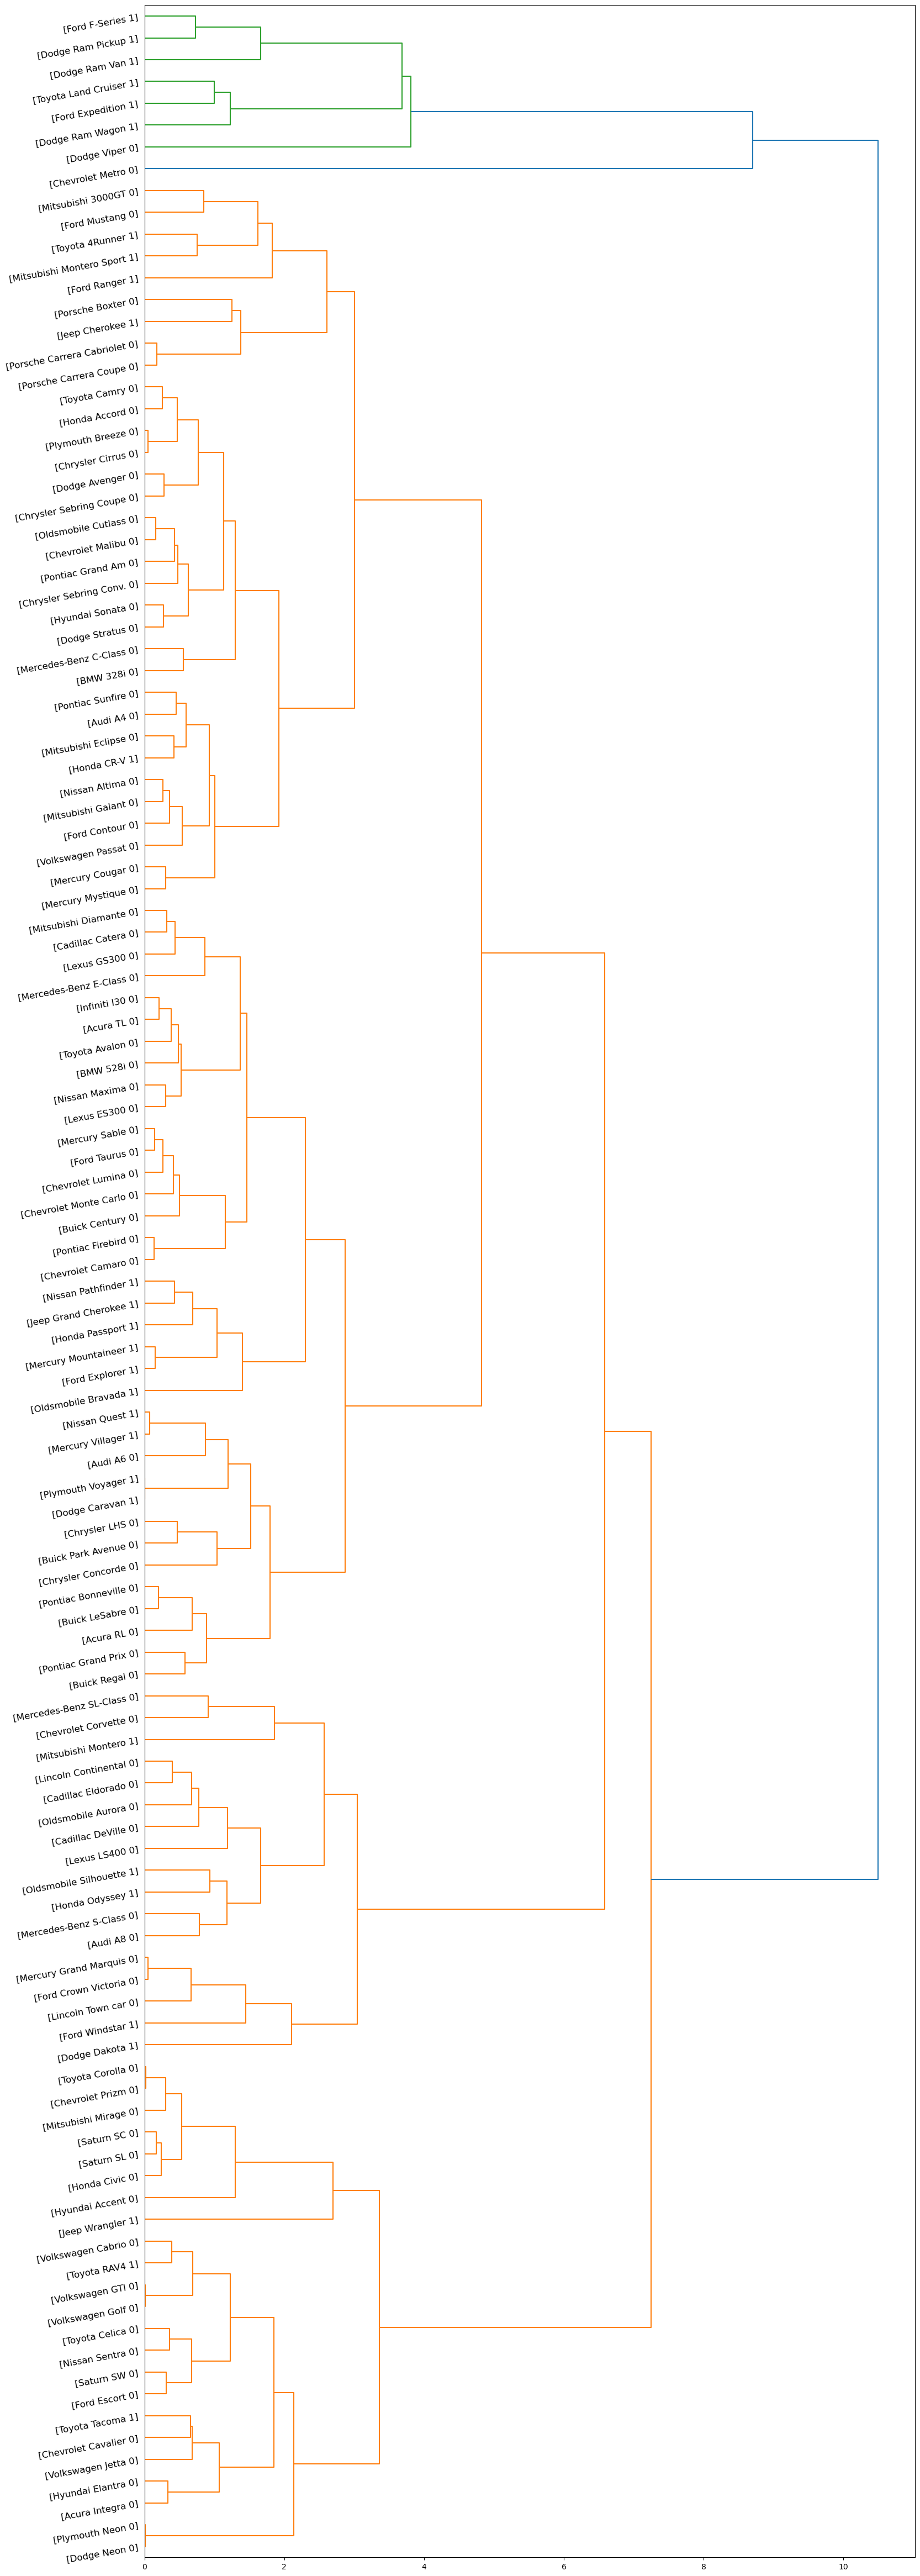

In [133]:
fig= pylab.figure(figsize=(18,60))
def rrr(id):
    return '[%s %s %s]' %(x['manufact'][id],x['model'][id],int(float(x['type'][id])))

dendro=hierarchy.dendrogram(z,leaf_label_func=rrr,leaf_rotation=10,leaf_font_size=12,orientation='right')

In [139]:
import numpy as np
mydata= pd.read_csv(r'C:\Users\nahal\Desktop\ML\customer.csv')
mydata

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [141]:
mydata.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [140]:
dbscan=DBSCAN(eps=0.5,min_samples=7)
dbscan.fit(x)
labels=dbscan.labels_
labels

ValueError: could not convert string to float: 'Acura'